In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv(r"C:\Users\chait\UofT_DSI_C7_Team_Project_eComm_Sales\data\raw\Amazon Sale Report.csv")


C:\Users\chait\AppData\Local\Temp\ipykernel_23212\1424846344.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\chait\UofT_DSI_C7_Team_Project_eComm_Sales\data\raw\Amazon Sale Report.csv")


In [4]:
# View first 5 rows
df.head()

# See number of rows, columns, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
df = df.drop(columns=['index', 'Unnamed: 22'])


In [6]:
df['Courier Status'] = df['Courier Status'].fillna('Unknown')
df = df.dropna(subset=['Amount'])


In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['ship-postal-code'] = df['ship-postal-code'].astype('Int64')


C:\Users\chait\AppData\Local\Temp\ipykernel_23212\401103026.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [8]:
df['Category'] = df['Category'].str.strip().str.lower()


In [9]:
df['Status'] = df['Status'].replace({
    'Shipped - Delivered to Buyer': 'Shipped',
    'Pending - Waiting for Pickup': 'Pending'
})


In [10]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import pandas as pd

# Read your CSV file into a DataFrame called df
df = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Check if loaded correctly
df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [13]:
# BASIC CLEANING
for col in ["index", "Unnamed: 22"]:
    if col in df.columns:
        df = df.drop(columns=[col])


In [14]:
# 2) BASIC CLEANING (light & safe)
# Drop obvious junk columns if present
for col in ["index", "Unnamed: 22"]:
    if col in df.columns:
        df = df.drop(columns=[col])


In [15]:

# Standardize column names (trim spaces)
df.columns = [c.strip() for c in df.columns]

In [16]:
# Parse date
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

C:\Users\chait\AppData\Local\Temp\ipykernel_23212\2563824390.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [17]:
# Postal code to integer-like (if exists)
if "ship-postal-code" in df.columns:
    # keep missing as <NA>
    df["ship-postal-code"] = pd.to_numeric(df["ship-postal-code"], errors="coerce").astype("Int64")

In [18]:
# Ensure Amount is numeric
if "Amount" in df.columns:
    df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

In [19]:
# Drop rows without Amount (we need it for sales)
if "Amount" in df.columns:
    df = df.dropna(subset=["Amount"])

In [20]:
# Fill a few common text columns to avoid blanks in grouping
for col in ["Status", "Fulfilment", "Category", "ship-city", "ship-state", "currency", "fulfilled-by"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace({"nan": np.nan})
        df[col] = df[col].fillna("Unknown")

In [21]:
# 3) DERIVED TIME FEATURES
if "Date" in df.columns:
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Year-Month"] = df["Date"].dt.to_period("M").astype(str)

In [22]:
# 4) PICK METRIC FOR “PROFIT” (fallback to Amount if Profit doesn’t exist)
value_col = "Profit" if "Profit" in df.columns else "Amount"
metric_name = "Profit" if "Profit" in df.columns else "Sales (Amount)"

print(f"Using '{value_col}' as the main value metric ({metric_name}).")


Using 'Amount' as the main value metric (Sales (Amount)).


In [23]:
# ---------------------------------------------------------
# A) SALES BY CATEGORY, CITY, FULFILLMENT
# ---------------------------------------------------------
def top_n(grouped_series, n=10):
    """Return top N rows of a grouped sum Series (desc)."""
    s = grouped_series.sort_values(ascending=False)
    return s.head(n)


Top Categories by Sales (Amount)
Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Blouse             458408.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64


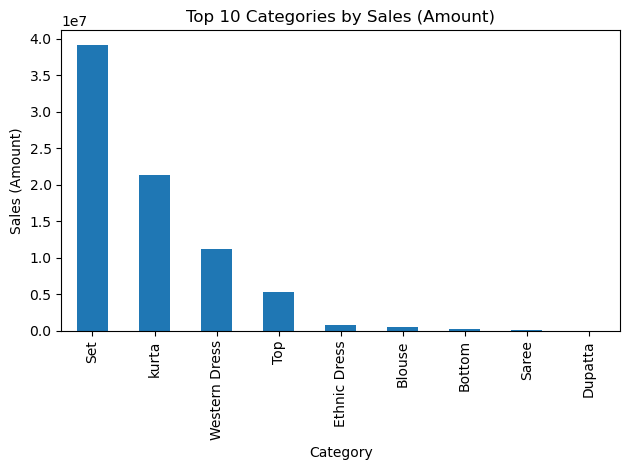

In [24]:
# 1) Category
if "Category" in df.columns:
    sales_by_cat = df.groupby("Category")[value_col].sum().sort_values(ascending=False)
    print("\nTop Categories by", metric_name)
    print(top_n(sales_by_cat, 10))

    # Plot
    plt.figure()
    sales_by_cat.head(10).plot(kind="bar")
    plt.title(f"Top 10 Categories by {metric_name}")
    plt.xlabel("Category")
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.show()


Top Cities by Sales (Amount)
ship-city
BENGALURU    6849664.99
HYDERABAD    4946032.82
MUMBAI       3704461.80
NEW DELHI    3613874.78
CHENNAI      3098745.74
PUNE         2338518.18
KOLKATA      1414978.87
GURUGRAM     1221618.74
THANE        1004355.29
LUCKNOW       933926.34
Name: Amount, dtype: float64


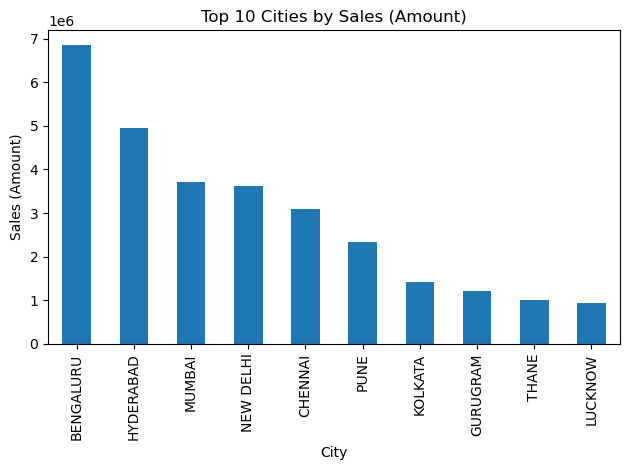

In [25]:
if "ship-city" in df.columns:
    sales_by_city = df.groupby("ship-city")[value_col].sum().sort_values(ascending=False)
    print("\nTop Cities by", metric_name)
    print(top_n(sales_by_city, 10))

    plt.figure()
    sales_by_city.head(10).plot(kind="bar")
    plt.title(f"Top 10 Cities by {metric_name}")
    plt.xlabel("City")
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.show()


Sales (Amount) by Fulfilment
Fulfilment
Amazon      54322151.0
Merchant    24270527.3
Name: Amount, dtype: float64


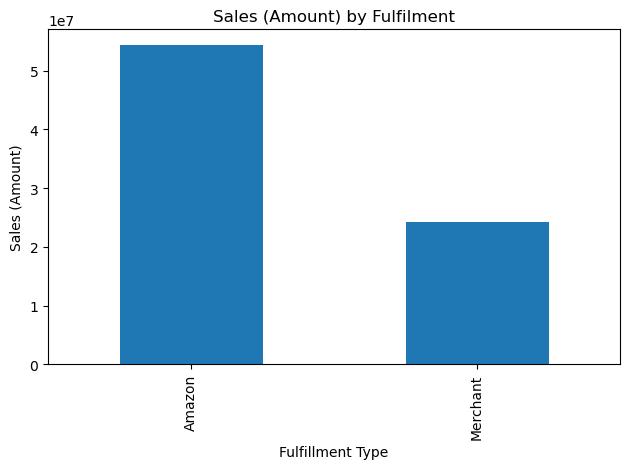

In [26]:

# 3) Fulfillment (Amazon vs Merchant, etc.)
# Use 'Fulfilment' if present; otherwise try 'fulfilled-by'
ful_col = "Fulfilment" if "Fulfilment" in df.columns else ("fulfilled-by" if "fulfilled-by" in df.columns else None)
if ful_col is not None:
    sales_by_ful = df.groupby(ful_col)[value_col].sum().sort_values(ascending=False)
    print(f"\n{metric_name} by {ful_col}")
    print(sales_by_ful)

    plt.figure()
    sales_by_ful.plot(kind="bar")
    plt.title(f"{metric_name} by {ful_col}")
    plt.xlabel("Fulfillment Type")
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.show()


Sales (Amount) by Order Status
Status
Shipped                          50324255.0
Shipped - Delivered to Buyer     18650815.0
Cancelled                         6919284.3
Shipped - Returned to Seller      1269644.0
Shipped - Picked Up                661252.0
Pending                            430271.0
Pending - Waiting for Pick Up      192138.0
Shipped - Returning to Seller      107620.0
Shipped - Out for Delivery          26971.0
Shipped - Rejected by Buyer          7295.0
Shipped - Lost in Transit            1997.0
Shipped - Damaged                    1136.0
Name: Amount, dtype: float64


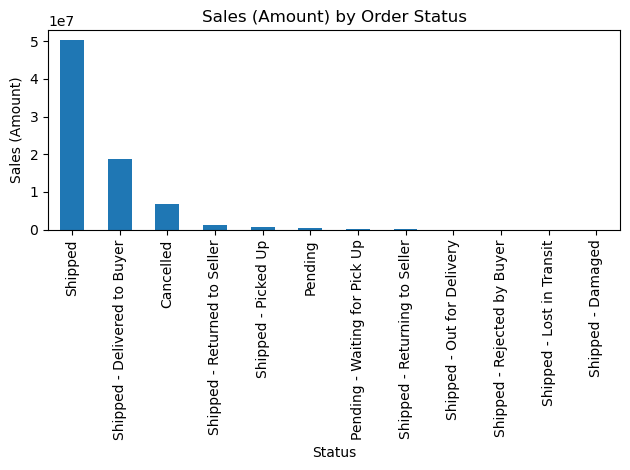

In [27]:
# ---------------------------------------------------------
# B) STATUS VS PROFIT/SALES TRENDS
# ---------------------------------------------------------
if "Status" in df.columns:
    status_metric = df.groupby("Status")[value_col].sum().sort_values(ascending=False)
    print(f"\n{metric_name} by Order Status")
    print(status_metric)

    plt.figure()
    status_metric.plot(kind="bar")
    plt.title(f"{metric_name} by Order Status")
    plt.xlabel("Status")
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.show()


Monthly Sales (Amount) Trend (sorted by time):
Year-Month
2022-03      101683.85
2022-06    23425809.38
2022-05    26226476.75
2022-04    28838708.32
Name: Amount, dtype: float64


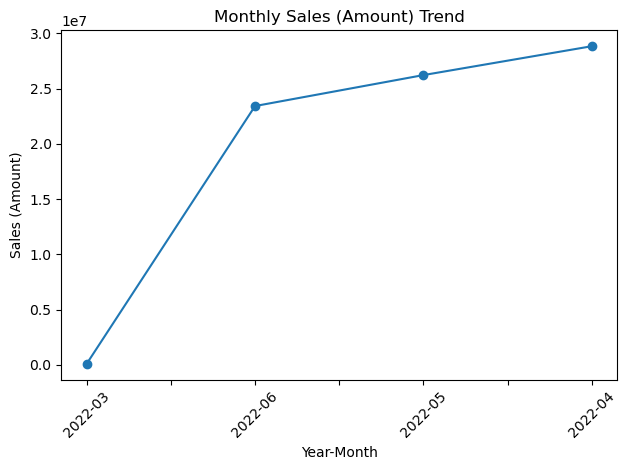

In [28]:
# ---------------------------------------------------------
# C) SEASONAL (MONTHLY) PATTERNS
# ---------------------------------------------------------
if "Year-Month" in df.columns:
    monthly = df.groupby("Year-Month")[value_col].sum().sort_values()
    print(f"\nMonthly {metric_name} Trend (sorted by time):")
    print(monthly.tail(12))  # show the most recent 12 months if you have many

    plt.figure()
    monthly.plot(kind="line", marker="o")
    plt.title(f"Monthly {metric_name} Trend")
    plt.xlabel("Year-Month")
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [29]:
# ---------------------------------------------------------
# D) QUICK PRINT: BASIC COUNTS (OPTIONAL)
# ---------------------------------------------------------
print("\nBasic counts:")
for col in ["Status", "Category", ful_col]:
    if col is not None and col in df.columns:
        print(f"- Unique {col}: {df[col].nunique()}")


Basic counts:
- Unique Status: 12
- Unique Category: 9
- Unique Fulfilment: 2


In [30]:
# ---------------------------------------------------------
# EDA with CSV Export & Plot Saving
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Create a folder to save outputs
os.makedirs("outputs", exist_ok=True)

# 1) LOAD
df = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# 2) BASIC CLEANING
for col in ["index", "Unnamed: 22"]:
    if col in df.columns:
        df = df.drop(columns=[col])

df.columns = [c.strip() for c in df.columns]
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df = df.dropna(subset=["Amount"])

# Fill missing text values
for col in ["Status", "Fulfilment", "Category", "ship-city", "ship-state", "currency", "fulfilled-by"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace({"nan": np.nan})
        df[col] = df[col].fillna("Unknown")

# Add time features
df["Year-Month"] = df["Date"].dt.to_period("M").astype(str)

# Pick main value metric
value_col = "Profit" if "Profit" in df.columns else "Amount"
metric_name = "Profit" if "Profit" in df.columns else "Sales (Amount)"
print(f"Using '{value_col}' as metric for analysis.\n")

# ---------------------------------------------------------
# Helper to export & plot
def save_results(df_grouped, name, kind="bar", title=None, xlabel=None, ylabel=None):
    csv_path = f"outputs/{name}.csv"
    png_path = f"outputs/{name}.png"
    df_grouped.to_csv(csv_path)
    print(f"✅ Saved: {csv_path}")

    # Plot
    plt.figure(figsize=(8, 5))
    df_grouped.head(10).plot(kind=kind)
    plt.title(title or name)
    plt.xlabel(xlabel or "")
    plt.ylabel(ylabel or metric_name)
    plt.tight_layout()
    plt.savefig(png_path)
    plt.close()
    print(f"📊 Plot saved: {png_path}\n")

# ---------------------------------------------------------
# A) SALES BY CATEGORY
if "Category" in df.columns:
    sales_by_cat = df.groupby("Category")[value_col].sum().sort_values(ascending=False)
    save_results(
        sales_by_cat,
        "sales_by_category",
        title=f"Top 10 Categories by {metric_name}",
        xlabel="Category",
        ylabel=metric_name
    )

# B) SALES BY CITY
if "ship-city" in df.columns:
    sales_by_city = df.groupby("ship-city")[value_col].sum().sort_values(ascending=False)
    save_results(
        sales_by_city,
        "sales_by_city",
        title=f"Top 10 Cities by {metric_name}",
        xlabel="City",
        ylabel=metric_name
    )

# C) SALES BY FULFILLMENT TYPE
ful_col = "Fulfilment" if "Fulfilment" in df.columns else "fulfilled-by" if "fulfilled-by" in df.columns else None
if ful_col:
    sales_by_ful = df.groupby(ful_col)[value_col].sum().sort_values(ascending=False)
    save_results(
        sales_by_ful,
        "sales_by_fulfillment",
        title=f"{metric_name} by {ful_col}",
        xlabel="Fulfillment Type",
        ylabel=metric_name
    )

# D) STATUS VS SALES
if "Status" in df.columns:
    status_metric = df.groupby("Status")[value_col].sum().sort_values(ascending=False)
    save_results(
        status_metric,
        "status_vs_sales",
        title=f"{metric_name} by Order Status",
        xlabel="Order Status",
        ylabel=metric_name
    )

# E) MONTHLY TREND
if "Year-Month" in df.columns:
    monthly = df.groupby("Year-Month")[value_col].sum().sort_values()
    save_results(
        monthly,
        "monthly_sales_trend",
        kind="line",
        title=f"Monthly {metric_name} Trend",
        xlabel="Year-Month",
        ylabel=metric_name
    )

print("🎉 All summary CSVs and charts saved in the 'outputs' folder.")


C:\Users\chait\AppData\Local\Temp\ipykernel_23212\2461564126.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


Using 'Amount' as metric for analysis.

✅ Saved: outputs/sales_by_category.csv
📊 Plot saved: outputs/sales_by_category.png

✅ Saved: outputs/sales_by_city.csv
📊 Plot saved: outputs/sales_by_city.png

✅ Saved: outputs/sales_by_fulfillment.csv
📊 Plot saved: outputs/sales_by_fulfillment.png

✅ Saved: outputs/status_vs_sales.csv
📊 Plot saved: outputs/status_vs_sales.png

✅ Saved: outputs/monthly_sales_trend.csv
📊 Plot saved: outputs/monthly_sales_trend.png

🎉 All summary CSVs and charts saved in the 'outputs' folder.


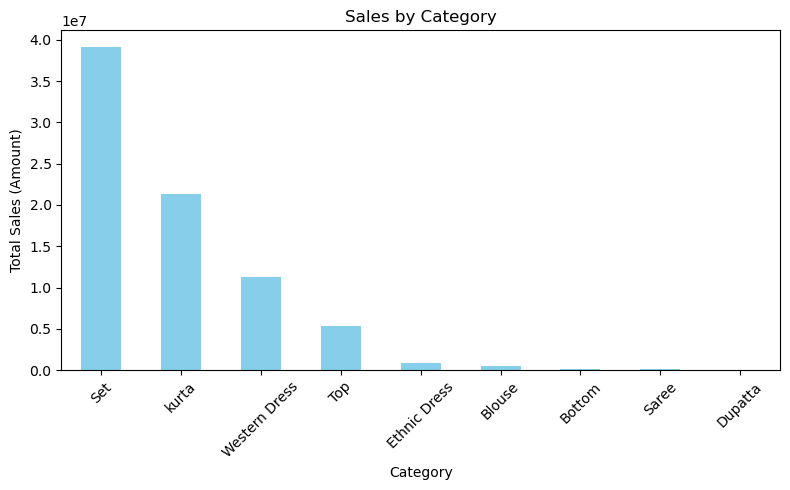

In [31]:
import matplotlib.pyplot as plt

# Group and sum sales by category
sales_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 5))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (Amount)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


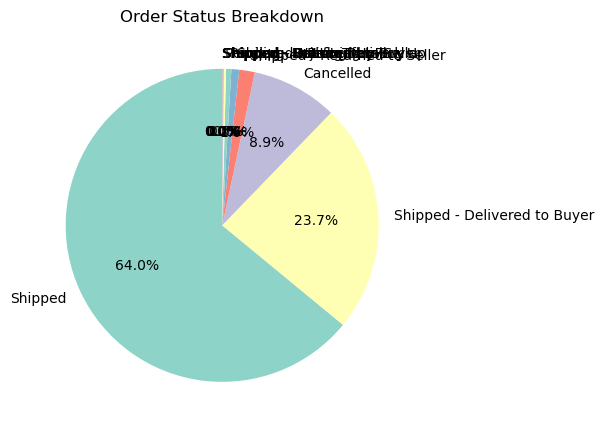

In [32]:
# Count number of orders per status
order_status_counts = df['Status'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
order_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3'])
plt.title('Order Status Breakdown')
plt.ylabel('')  # Hides the y-axis label
plt.tight_layout()
plt.show()


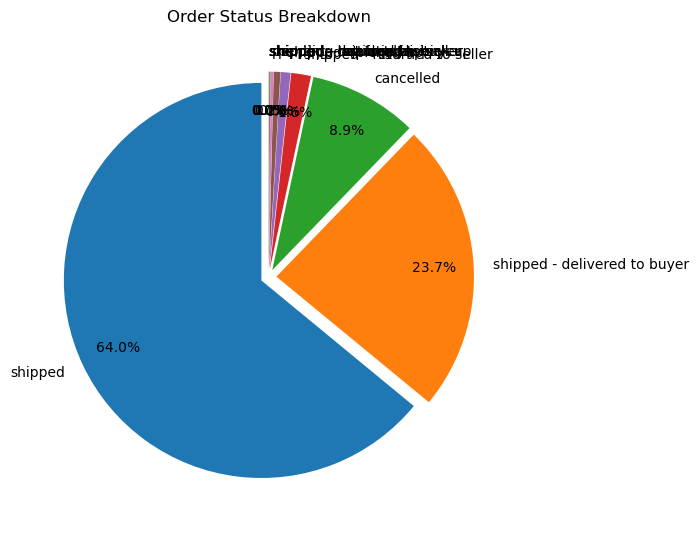

In [38]:
import matplotlib.pyplot as plt

# Count statuses
counts = df['Status'].value_counts()

# Explode each slice slightly
explode = [0.04] * len(counts)

plt.figure(figsize=(7,7))
counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,      # moves percent labels inward
    labeldistance=1.1,     # pushes labels outward
    explode=explode,
    textprops={'fontsize': 10}  # make text crisp
)

plt.title("Order Status Breakdown")
plt.ylabel('')
plt.tight_layout()

plt.savefig("outputs/order_status_breakdown_clean.png")
plt.show()


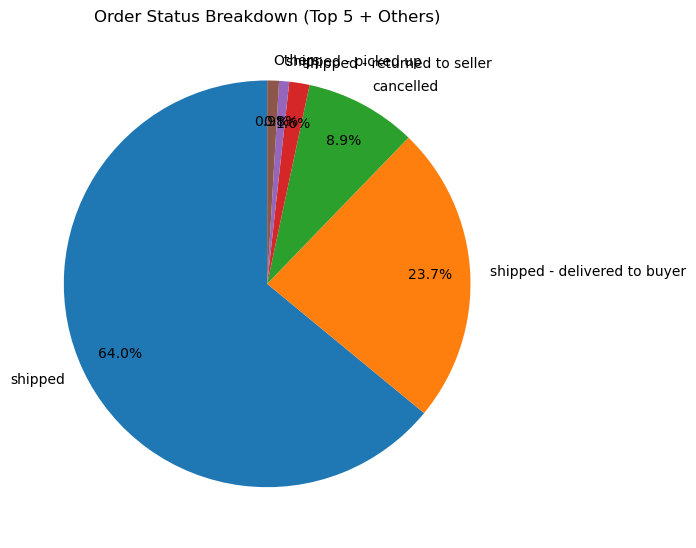

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

counts = df['Status'].value_counts()

# Top 5 categories
top5 = counts.nlargest(5)

# Create "Others"
others_sum = counts.iloc[5:].sum()

# Concatenate properly
clean_counts = pd.concat([top5, pd.Series({'Others': others_sum})])

plt.figure(figsize=(7,7))
clean_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,      # Move percentage inward
    labeldistance=1.1,    # Move labels outward
    textprops={'fontsize': 10}
)

plt.title("Order Status Breakdown (Top 5 + Others)")
plt.ylabel('')
plt.tight_layout()
plt.show()


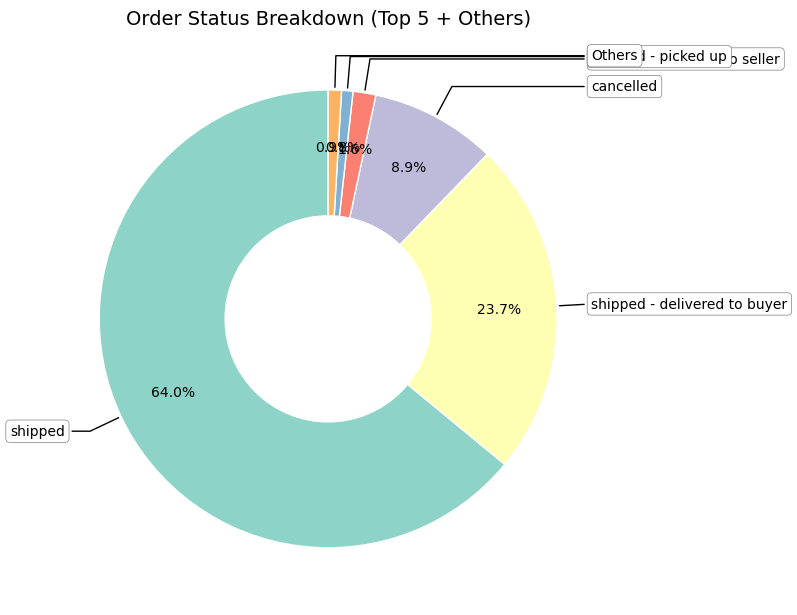

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# ----- Prepare Data -----
counts = df['Status'].value_counts()

# Top 5 categories
top5 = counts.nlargest(5)

# Group remaining as "Others"
others_sum = counts.iloc[5:].sum()
clean_counts = pd.concat([top5, pd.Series({'Others': others_sum})])

# Colors (pastel)
colors = plt.cm.Set3(range(len(clean_counts)))

# ----- Plot Donut Chart -----
fig, ax = plt.subplots(figsize=(8,8))

wedges, texts, autotexts = ax.pie(
    clean_counts,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.75,   # Adjust % label position
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Add donut hole
centre = plt.Circle((0,0), 0.45, color='white', fc='white')
fig.gca().add_artist(centre)

# ----- Add labels outside with lines -----
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=10, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1   # midpoint angle
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    # Horizontal alignment of labels
    ha = "left" if x > 0 else "right"
    connectionstyle = f"angle,angleA=0,angleB={ang}"

    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(f"{clean_counts.index[i]}",
                xy=(x, y),
                xytext=(1.15 * np.sign(x), 1.15 * y),
                ha=ha, **kw)

# Title
plt.title("Order Status Breakdown (Top 5 + Others)", fontsize=14)

plt.tight_layout()
plt.show()


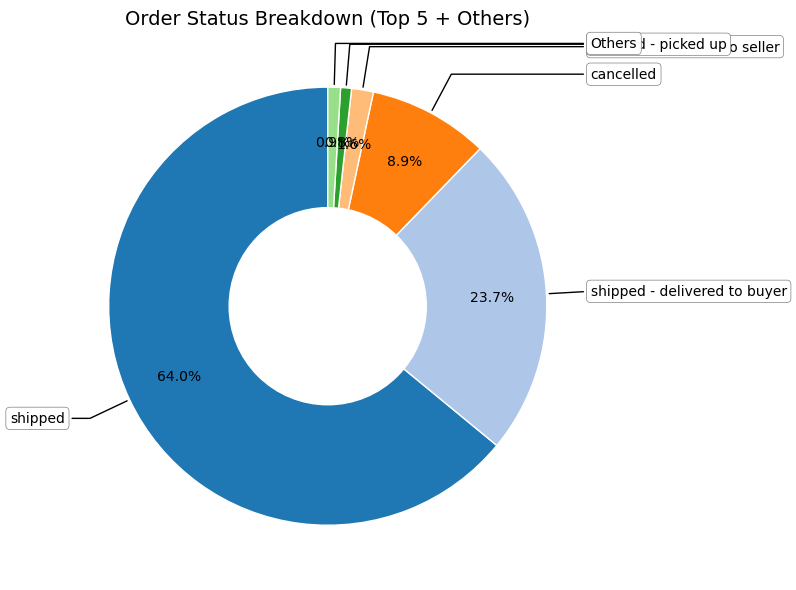

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ----- Prepare Data -----
counts = df['Status'].value_counts()

# Top 5 statuses
top5 = counts.nlargest(5)

# Group all smaller ones under "Others"
others_sum = counts.iloc[5:].sum()
clean_counts = pd.concat([top5, pd.Series({'Others': others_sum})])

# Bright colors
colors = plt.cm.tab20(range(len(clean_counts)))   # vibrant color set

# ----- Plot Donut Chart -----
fig, ax = plt.subplots(figsize=(8,8))

wedges, texts, autotexts = ax.pie(
    clean_counts,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.75,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Donut hole
centre_circle = plt.Circle((0,0), 0.45, color='white')
fig.gca().add_artist(centre_circle)

# ----- Labels Outside with Arrow Lines -----
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=10, va="center")

for i, p in enumerate(wedges):
    angle = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))
    
    ha = "left" if x > 0 else "right"
    connectionstyle = f"angle,angleA=0,angleB={angle}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate(f"{clean_counts.index[i]}",
                xy=(x, y),
                xytext=(1.2*np.sign(x), 1.2*y),
                ha=ha, **kw)

plt.title("Order Status Breakdown (Top 5 + Others)", fontsize=14)
plt.tight_layout()
plt.show()


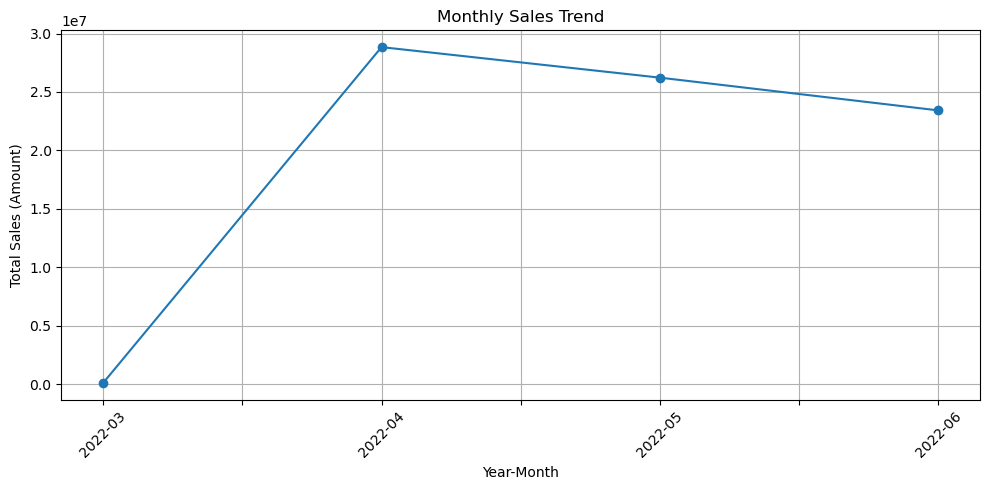

In [33]:
# Ensure date column is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month and year
df['Year-Month'] = df['Date'].dt.to_period('M').astype(str)

# Group by month
monthly_sales = df.groupby('Year-Month')['Amount'].sum()

# Plot line chart
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (Amount)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


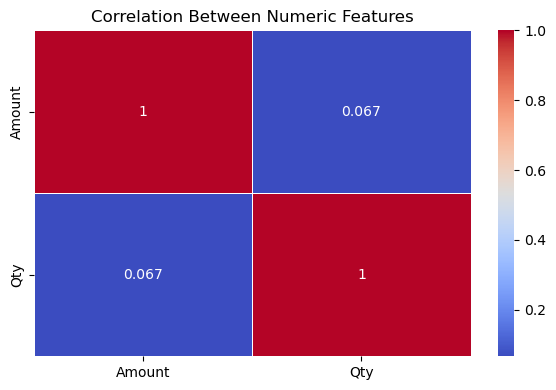

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick only numeric columns that exist in the dataset
numeric_cols = [c for c in ['Amount', 'Qty', 'Discount'] if c in df.columns]

if len(numeric_cols) >= 2:
    corr_data = df[numeric_cols].corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Between Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns found for a correlation heatmap.")


In [35]:
import numpy as np

# Fill missing text fields with "Unknown"
for col in ["Courier Status", "ship-city", "ship-state", "ship-country", "fulfilled-by"]:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

# Drop rows where Amount is missing (essential for analysis)
if "Amount" in df.columns:
    df = df.dropna(subset=["Amount"])

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Create new columns for month and year
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# Clean up postal code (make it integer)
if "ship-postal-code" in df.columns:
    df["ship-postal-code"] = pd.to_numeric(df["ship-postal-code"], errors="coerce").astype("Int64")

# Clean category and state names for consistency
for col in ["Category", "ship-state", "Status"]:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()

# Replace empty text with "unknown"
df = df.replace("", "Unknown")

print("✅ Data cleaning complete!")
print("Rows:", df.shape[0], "| Columns:", df.shape[1])


✅ Data cleaning complete!
Rows: 121180 | Columns: 25


In [36]:
df.info()
df.describe()
df['Category'].value_counts().head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            121180 non-null  object        
 1   Date                121180 non-null  datetime64[ns]
 2   Status              121180 non-null  object        
 3   Fulfilment          121180 non-null  object        
 4   Sales Channel       121180 non-null  object        
 5   ship-service-level  121180 non-null  object        
 6   Style               121180 non-null  object        
 7   SKU                 121180 non-null  object        
 8   Category            121180 non-null  object        
 9   Size                121180 non-null  object        
 10  ASIN                121180 non-null  object        
 11  Courier Status      121180 non-null  object        
 12  Qty                 121180 non-null  int64         
 13  currency            121180 non-nul

Category
set              47042
kurta            46717
western dress    14704
top              10165
ethnic dress      1093
blouse             881
bottom             420
saree              155
dupatta              3
Name: count, dtype: int64

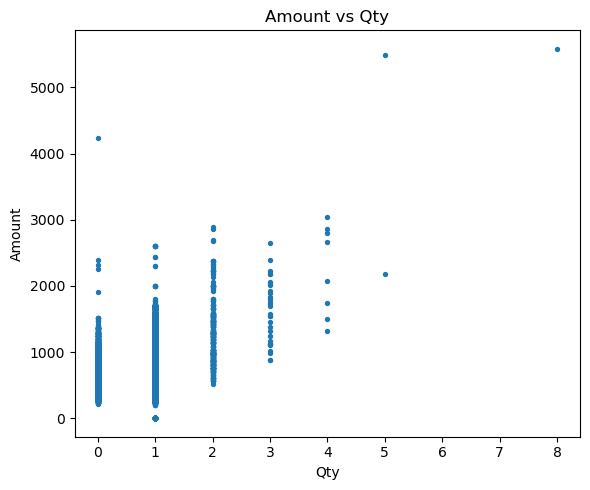

In [37]:
plt.figure(figsize=(6,5))
plt.scatter(df["Qty"], df["Amount"], s=8)
plt.title("Amount vs Qty")
plt.xlabel("Qty")
plt.ylabel("Amount")
plt.tight_layout()
plt.savefig("outputs/scatter_amount_qty.png")
plt.show()
